# Jupyter for Security Analytics

## Introduction
> The Jupyter Notebook is an open-source web application that allows you to create and share documents that contain live code, equations, visualizations and narrative text. Uses include: data cleaning and transformation, numerical simulation, statistical modeling, data visualization, machine learning, and much more.

Architecture: 

Note: In Jupyter, a kernel can be thought of a specific language installation. In this tutorial, we will only focus on the python3 jupyter kernel

![title](fixtures/images/ipy_kernel_and_terminal.png)
![title](fixtures/images/notebook_components.png)

## Installation
https://jupyterlab.readthedocs.io/en/stable/getting_started/installation.html

### Pip Installation
If you have pip on your machine, you can just run ```pip install jupyterlab```

### Anaconda installation
Usually I just use anaconda to install jupyter and all the python pacakges I need to use. 

1. The anaconda installation can be found here: https://conda.io/miniconda.html
2. Unzip and execute the installer
3. Once it is installed, run ```conda install -c conda-forge jupyterlab```

## Hello World!
Open a new terminal and type ```jupyter lab```

> ➜  lectures git:(lab2) ✗ jupyter lab
[I 13:53:50.235 LabApp] JupyterLab beta preview extension loaded from /Users/untitled/anaconda3/lib/python3.6/site-packages/jupyterlab
[I 13:53:50.235 LabApp] JupyterLab application directory is /Users/untitled/anaconda3/share/jupyter/lab
[I 13:53:50.242 LabApp] Serving notebooks from local directory: /Users/untitled/Documents/School/Security-Analytics/lectures
[I 13:53:50.242 LabApp] 0 active kernels
[I 13:53:50.242 LabApp] The Jupyter Notebook is running at:
[I 13:53:50.242 LabApp] http://localhost:8888/?token=d394c3fb833d33551d0548c3c4222ff22b8429890c485538
[I 13:53:50.242 LabApp] Use Control-C to stop this server and shut down all kernels (twice to skip confirmation).

In [3]:
print("Hello World!")

Hello World!


#### Variables and Scope

In [4]:
x = 'Variable Replacement'
a = 1

In [5]:
x.replace('Replacement','Scope')

'Variable Scope'

In [6]:
a

1

In [7]:
a + 1

2

In [8]:
a = a + 10

In [9]:
a

11

Note: When you reassign a variable, even if you go back and run previous cells that referenced that variable, it will still be different

## Pandas

> In computer programming, pandas is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series. 

Author: http://wesmckinney.com/

### Sample dataset
https://www.kaggle.com/xwolf12/malicious-and-benign-websites/version/3

In [10]:
!head -n 2 fixtures/datasets/dataset.csv

URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
M0_109,16,7,iso-8859-1,nginx,263,None,None,10/10/2015 18:21,None,7,0,2,700,9,10,1153,832,9,2,1


In [11]:
import pandas as pd

In [12]:
# Read the file in from CSV
df = pd.read_csv('fixtures/datasets/dataset.csv')

In [ ]:
# Read the file in from json
import json 
df = pd.read_json(
    json.loads(open('fixtures/datasets/dataset.json', 'r').read()),
    orient='records'
)

In [13]:
# Get a list of the columns and their data types
df.dtypes

URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
WHOIS_STATEPRO                object
WHOIS_REGDATE                 object
WHOIS_UPDATED_DATE            object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

In [14]:
# View a row in the dataframe
df.head(1)

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.0,1


### DataFrame

In [16]:
df.describe()

,APP_BYTES,APP_PACKETS,CONTENT_LENGTH,DIST_REMOTE_TCP_PORT,DNS_QUERY_TIMES,NUMBER_SPECIAL_CHARACTERS,REMOTE_APP_BYTES,REMOTE_APP_PACKETS,REMOTE_IPS,SOURCE_APP_BYTES,SOURCE_APP_PACKETS,TCP_CONVERSATION_EXCHANGE,Type,URL_LENGTH
count,1.781000e+03,1781.000000,969.000000,1781.000000,1780.000000,1781.000000,1.781000e+03,1781.000000,1781.000000,1.781000e+03,1781.000000,1781.000000,1781.000000,1781.000000
mean,2.982339e+03,18.540146,11726.927761,5.472768,2.263483,11.111735,3.155599e+03,18.746210,3.060640,1.589255e+04,18.540146,16.261089,0.121280,56.961258
std,5.605057e+04,41.627173,36391.809051,21.807327,2.930853,4.549896,5.605378e+04,46.397969,3.386975,6.986193e+04,41.627173,40.500975,0.326544,27.555586
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,16.000000
25%,0.000000e+00,0.000000,324.000000,0.000000,0.000000,8.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,39.000000
50%,6.720000e+02,8.000000,1853.000000,0.000000,0.000000,10.000000,7.350000e+02,9.000000,2.000000,5.790000e+02,8.000000,7.000000,0.000000,49.000000
75%,2.328000e+03,26.000000,11323.000000,5.000000,4.000000,13.000000,2.701000e+03,25.000000,5.000000,9.806000e+03,26.000000,22.000000,0.000000,68.000000
max,2.362906e+06,1198.000000,649263.000000,708.000000,20.000000,43.000000,2.362906e+06,1284.000000,17.000000,2.060012e+06,1198.000000,1194.000000,1.000000,249.000000


In [17]:
# Size of the dataset
len(df)

1781

In [18]:
# First five items of the 'URL' column
df['URL'].head(5)

0     M0_109
1    B0_2314
2     B0_911
3     B0_113
4     B0_403
Name: URL, dtype: object

In [19]:
# Dropping a column
df.drop('URL', axis=1).head(5)

,APP_BYTES,APP_PACKETS,CHARSET,CONTENT_LENGTH,DIST_REMOTE_TCP_PORT,DNS_QUERY_TIMES,NUMBER_SPECIAL_CHARACTERS,REMOTE_APP_BYTES,REMOTE_APP_PACKETS,REMOTE_IPS,SERVER,SOURCE_APP_BYTES,SOURCE_APP_PACKETS,TCP_CONVERSATION_EXCHANGE,Type,URL_LENGTH,WHOIS_COUNTRY,WHOIS_REGDATE,WHOIS_STATEPRO,WHOIS_UPDATED_DATE
0,700,9,iso-8859-1,263.0,0,2.0,7,832,10,2,nginx,1153,9,7,1,16,None,10/10/2015 18:21,None,None
1,1230,17,UTF-8,15087.0,7,0.0,6,1230,19,4,Apache/2.4.10,1265,17,17,0,16,None,None,None,None
2,0,0,us-ascii,324.0,0,0.0,6,0,0,0,Microsoft-HTTPAPI/2.0,0,0,0,0,16,None,None,None,None
3,3812,39,ISO-8859-1,162.0,22,8.0,6,4380,37,3,nginx,18784,39,31,0,17,US,7/10/1997 4:00,AK,12/09/2013 0:45
4,4278,61,UTF-8,124140.0,2,4.0,6,4586,62,5,None,129889,61,57,0,17,US,12/05/1996 0:00,TX,11/04/2017 0:00


In [20]:
# Count of entries in a column
df['WHOIS_COUNTRY'].value_counts().head(5)

US      1103
None     306
CA        84
ES        63
AU        35
Name: WHOIS_COUNTRY, dtype: int64

In [21]:
# Select rows where a column is a certain value
df.loc[df['WHOIS_COUNTRY'] == 'US'].head(5)

,APP_BYTES,APP_PACKETS,CHARSET,CONTENT_LENGTH,DIST_REMOTE_TCP_PORT,DNS_QUERY_TIMES,NUMBER_SPECIAL_CHARACTERS,REMOTE_APP_BYTES,REMOTE_APP_PACKETS,REMOTE_IPS,...,SOURCE_APP_BYTES,SOURCE_APP_PACKETS,TCP_CONVERSATION_EXCHANGE,Type,URL,URL_LENGTH,WHOIS_COUNTRY,WHOIS_REGDATE,WHOIS_STATEPRO,WHOIS_UPDATED_DATE
3,3812,39,ISO-8859-1,162.0,22,8.0,6,4380,37,3,...,18784,39,31,0,B0_113,17,US,7/10/1997 4:00,AK,12/09/2013 0:45
4,4278,61,UTF-8,124140.0,2,4.0,6,4586,62,5,...,129889,61,57,0,B0_403,17,US,12/05/1996 0:00,TX,11/04/2017 0:00
6,1189,14,iso-8859-1,345.0,0,2.0,6,1327,13,3,...,8559,14,12,0,B0_462,18,US,29/07/2002 0:00,CO,1/07/2016 0:00
7,0,0,us-ascii,324.0,0,0.0,6,0,0,0,...,0,0,0,0,B0_1128,19,US,18/03/1997 0:00,FL,19/03/2017 0:00
10,0,0,utf-8,NaN,0,0.0,6,0,0,0,...,0,0,0,0,B0_1013,20,US,14/09/2007 0:00,Kansas,9/09/2015 0:00


In [22]:
# Select rows where two colunns are certain values (AND)
df.loc[(df['WHOIS_COUNTRY'] == 'US') & (df['DIST_REMOTE_TCP_PORT'] == 22)].head(5)

,APP_BYTES,APP_PACKETS,CHARSET,CONTENT_LENGTH,DIST_REMOTE_TCP_PORT,DNS_QUERY_TIMES,NUMBER_SPECIAL_CHARACTERS,REMOTE_APP_BYTES,REMOTE_APP_PACKETS,REMOTE_IPS,...,SOURCE_APP_BYTES,SOURCE_APP_PACKETS,TCP_CONVERSATION_EXCHANGE,Type,URL,URL_LENGTH,WHOIS_COUNTRY,WHOIS_REGDATE,WHOIS_STATEPRO,WHOIS_UPDATED_DATE
3,3812,39,ISO-8859-1,162.0,22,8.0,6,4380,37,3,...,18784,39,31,0,B0_113,17,US,7/10/1997 4:00,AK,12/09/2013 0:45
720,5308,54,utf-8,636.0,22,8.0,10,5902,51,8,...,40052,54,46,0,B0_541,45,US,18/01/1995 0:00,CA,26/08/2015 0:00
943,4677,41,UTF-8,NaN,22,6.0,10,5093,33,11,...,14310,41,35,0,B0_435,51,US,12/12/2003 0:00,CA,18/10/2016 0:00
1197,4932,35,ISO-8859-1,NaN,22,6.0,11,5392,41,3,...,23578,35,29,0,B0_359,60,US,28/08/2001 0:00,Illinois,28/04/2015 0:00
1550,4523,32,UTF-8,15187.0,22,6.0,13,4979,34,1,...,26400,32,26,0,B0_122,87,US,13/01/2001 0:12,CA,12/12/2015 10:16


In [23]:
# Select rows where two colunns are certain values (OR)
df.loc[(df['WHOIS_COUNTRY'] == 'US') | (df['DIST_REMOTE_TCP_PORT'] == 22)].head(5)

,APP_BYTES,APP_PACKETS,CHARSET,CONTENT_LENGTH,DIST_REMOTE_TCP_PORT,DNS_QUERY_TIMES,NUMBER_SPECIAL_CHARACTERS,REMOTE_APP_BYTES,REMOTE_APP_PACKETS,REMOTE_IPS,...,SOURCE_APP_BYTES,SOURCE_APP_PACKETS,TCP_CONVERSATION_EXCHANGE,Type,URL,URL_LENGTH,WHOIS_COUNTRY,WHOIS_REGDATE,WHOIS_STATEPRO,WHOIS_UPDATED_DATE
3,3812,39,ISO-8859-1,162.0,22,8.0,6,4380,37,3,...,18784,39,31,0,B0_113,17,US,7/10/1997 4:00,AK,12/09/2013 0:45
4,4278,61,UTF-8,124140.0,2,4.0,6,4586,62,5,...,129889,61,57,0,B0_403,17,US,12/05/1996 0:00,TX,11/04/2017 0:00
6,1189,14,iso-8859-1,345.0,0,2.0,6,1327,13,3,...,8559,14,12,0,B0_462,18,US,29/07/2002 0:00,CO,1/07/2016 0:00
7,0,0,us-ascii,324.0,0,0.0,6,0,0,0,...,0,0,0,0,B0_1128,19,US,18/03/1997 0:00,FL,19/03/2017 0:00
10,0,0,utf-8,NaN,0,0.0,6,0,0,0,...,0,0,0,0,B0_1013,20,US,14/09/2007 0:00,Kansas,9/09/2015 0:00


In [24]:
# Sum of total query times for US traffic
df.loc[df['WHOIS_COUNTRY'] == 'US']['DNS_QUERY_TIMES'].sum()

2530.0

In [25]:
# Average total query times for US traffic
us_df = df.loc[df['WHOIS_COUNTRY'] == 'US']
us_df['DNS_QUERY_TIMES'].sum() / len(us_df)

2.2937443336355394

In [26]:
# Function mapping, make all values uppercase 
df['WHOIS_COUNTRY'].map(lambda x: x.upper()).head(5)

0    NONE
1    NONE
2    NONE
3      US
4      US
Name: WHOIS_COUNTRY, dtype: object

In [27]:
df['WHOIS_COUNTRY'] = df['WHOIS_COUNTRY'].map(lambda x: x.upper())

In [28]:
# Reassign mapping
us_df['WHOIS_STATEPRO'] = us_df['WHOIS_STATEPRO'].map(lambda x: x.upper())

/Users/untitled/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [29]:
def check_apache(val):
    if not val:
        return False
    if 'apache' in val.lower():
        return True
    else:
        return False

In [30]:
df['SERVER'].map(lambda x: check_apache(x)).sum()

643

In [31]:
df['IS_APACHE'] = df['SERVER'].map(lambda x: check_apache(x))

In [32]:
# Select the values where WHOIS_COUNTRY is not null
df[df['WHOIS_COUNTRY'].notnull()].head(5)

,APP_BYTES,APP_PACKETS,CHARSET,CONTENT_LENGTH,DIST_REMOTE_TCP_PORT,DNS_QUERY_TIMES,NUMBER_SPECIAL_CHARACTERS,REMOTE_APP_BYTES,REMOTE_APP_PACKETS,REMOTE_IPS,...,SOURCE_APP_PACKETS,TCP_CONVERSATION_EXCHANGE,Type,URL,URL_LENGTH,WHOIS_COUNTRY,WHOIS_REGDATE,WHOIS_STATEPRO,WHOIS_UPDATED_DATE,IS_APACHE
0,700,9,iso-8859-1,263.0,0,2.0,7,832,10,2,...,9,7,1,M0_109,16,NONE,10/10/2015 18:21,None,None,False
1,1230,17,UTF-8,15087.0,7,0.0,6,1230,19,4,...,17,17,0,B0_2314,16,NONE,None,None,None,True
2,0,0,us-ascii,324.0,0,0.0,6,0,0,0,...,0,0,0,B0_911,16,NONE,None,None,None,False
3,3812,39,ISO-8859-1,162.0,22,8.0,6,4380,37,3,...,39,31,0,B0_113,17,US,7/10/1997 4:00,AK,12/09/2013 0:45,False
4,4278,61,UTF-8,124140.0,2,4.0,6,4586,62,5,...,61,57,0,B0_403,17,US,12/05/1996 0:00,TX,11/04/2017 0:00,False


### Data Aggregation, Group Operations, and Pivots

In [33]:
df.groupby('WHOIS_COUNTRY').agg(['count']).head()

,APP_BYTES,APP_PACKETS,CHARSET,CONTENT_LENGTH,DIST_REMOTE_TCP_PORT,DNS_QUERY_TIMES,NUMBER_SPECIAL_CHARACTERS,REMOTE_APP_BYTES,REMOTE_APP_PACKETS,REMOTE_IPS,...,SOURCE_APP_BYTES,SOURCE_APP_PACKETS,TCP_CONVERSATION_EXCHANGE,Type,URL,URL_LENGTH,WHOIS_REGDATE,WHOIS_STATEPRO,WHOIS_UPDATED_DATE,IS_APACHE
,count,count,count,count,count,count,count,count,count,count,...,count,count,count,count,count,count,count,count,count,count
WHOIS_COUNTRY,,,,,,,,,,,,,,,,,,,,,
AE,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
AT,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
AU,35,35,35,16,35,35,35,35,35,35,...,35,35,35,35,35,35,35,35,35,35
BE,3,3,3,2,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
BR,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [34]:
df.groupby(['WHOIS_COUNTRY', 'IS_APACHE']).size().reset_index(name='counts').head(5)


,WHOIS_COUNTRY,IS_APACHE,counts
0,AE,True,1
1,AT,True,4
2,AU,False,10
3,AU,True,25
4,BE,True,3


In [35]:
g = df.groupby(['WHOIS_COUNTRY', 'IS_APACHE']).size().reset_index(name='counts')

In [36]:
g.pivot(index='WHOIS_COUNTRY', columns='IS_APACHE').fillna(0.0).head(5)

counts      
IS_APACHE      False True 
WHOIS_COUNTRY             
AE               0.0   1.0
AT               0.0   4.0
AU              10.0  25.0
BE               0.0   3.0
BR               2.0   0.0

In [37]:
pivot = g.pivot(index='WHOIS_COUNTRY', columns='IS_APACHE').fillna(0.0)

In [38]:
pivot.div(pivot.sum(axis=1), axis=0).head(5)

counts          
IS_APACHE         False     True 
WHOIS_COUNTRY                    
AE             0.000000  1.000000
AT             0.000000  1.000000
AU             0.285714  0.714286
BE             0.000000  1.000000
BR             1.000000  0.000000

In [39]:
pivot_perc = pivot.div(pivot.sum(axis=1), axis=0)

## Matplotlib

> matplotlib is a plotting library for the Python programming language and its numerical mathematics extension NumPy. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like Tkinter, wxPython, Qt, or GTK+

In [40]:
import matplotlib.pyplot as plt
import matplotlib

In [41]:
list(df)

['APP_BYTES',
 'APP_PACKETS',
 'CHARSET',
 'CONTENT_LENGTH',
 'DIST_REMOTE_TCP_PORT',
 'DNS_QUERY_TIMES',
 'NUMBER_SPECIAL_CHARACTERS',
 'REMOTE_APP_BYTES',
 'REMOTE_APP_PACKETS',
 'REMOTE_IPS',
 'SERVER',
 'SOURCE_APP_BYTES',
 'SOURCE_APP_PACKETS',
 'TCP_CONVERSATION_EXCHANGE',
 'Type',
 'URL',
 'URL_LENGTH',
 'WHOIS_COUNTRY',
 'WHOIS_REGDATE',
 'WHOIS_STATEPRO',
 'WHOIS_UPDATED_DATE',
 'IS_APACHE']

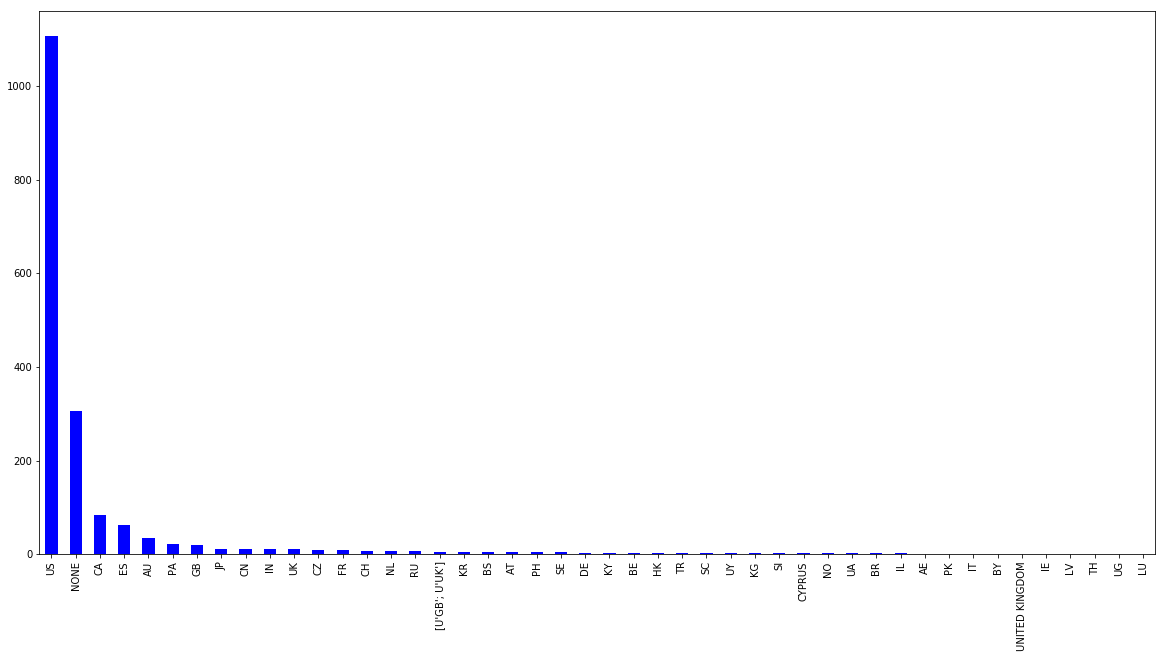

In [42]:
# Country plots 
df['WHOIS_COUNTRY'].value_counts().plot(kind='bar', figsize=(20,10), color='b')
plt.show()

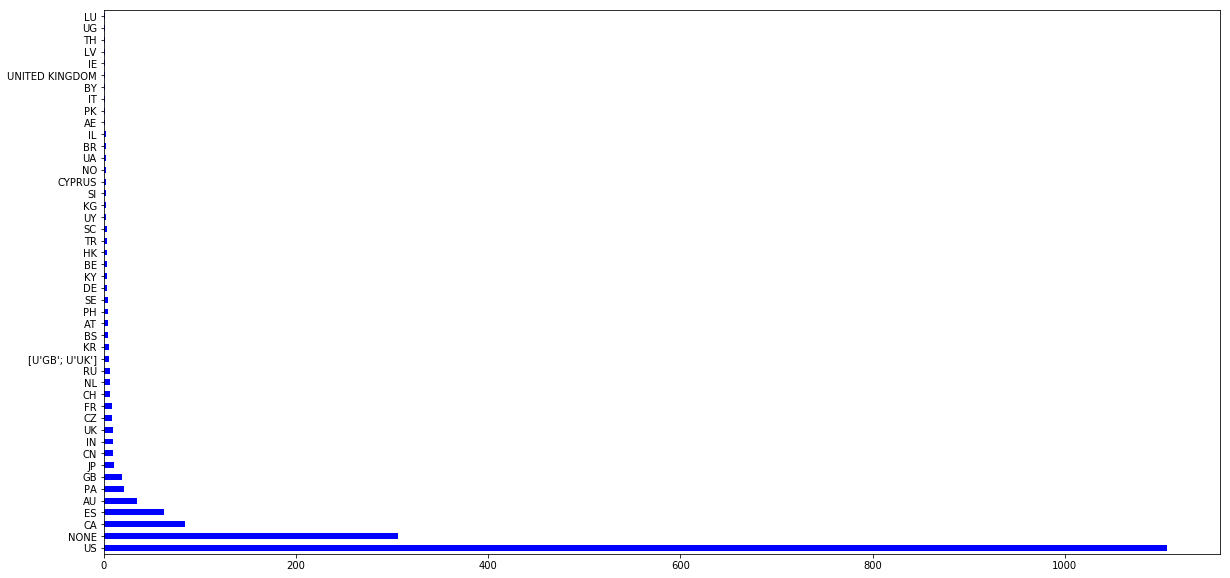

In [43]:
# Plot horizontally
df['WHOIS_COUNTRY'].value_counts().plot(kind='barh', figsize=(20,10), color='b')
plt.show()

Text(0.5,0,'Percentage')

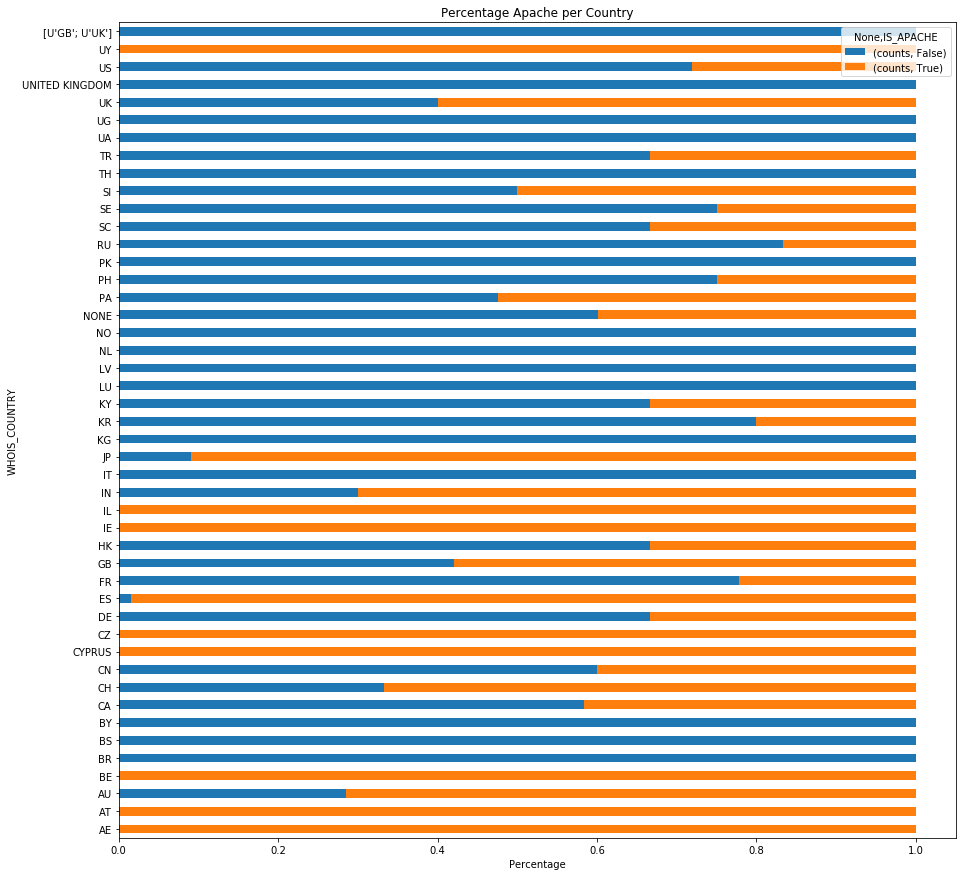

In [51]:
# Plot pivot and set labels
ax = pivot_perc.plot(kind='barh', stacked=True, figsize=(15,15))
ax.set_title('Percentage Apache per Country')
ax.set_xlabel('Percentage')

In [45]:
list(df)

['APP_BYTES',
 'APP_PACKETS',
 'CHARSET',
 'CONTENT_LENGTH',
 'DIST_REMOTE_TCP_PORT',
 'DNS_QUERY_TIMES',
 'NUMBER_SPECIAL_CHARACTERS',
 'REMOTE_APP_BYTES',
 'REMOTE_APP_PACKETS',
 'REMOTE_IPS',
 'SERVER',
 'SOURCE_APP_BYTES',
 'SOURCE_APP_PACKETS',
 'TCP_CONVERSATION_EXCHANGE',
 'Type',
 'URL',
 'URL_LENGTH',
 'WHOIS_COUNTRY',
 'WHOIS_REGDATE',
 'WHOIS_STATEPRO',
 'WHOIS_UPDATED_DATE',
 'IS_APACHE']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x121d17710>,
      dtype=object)

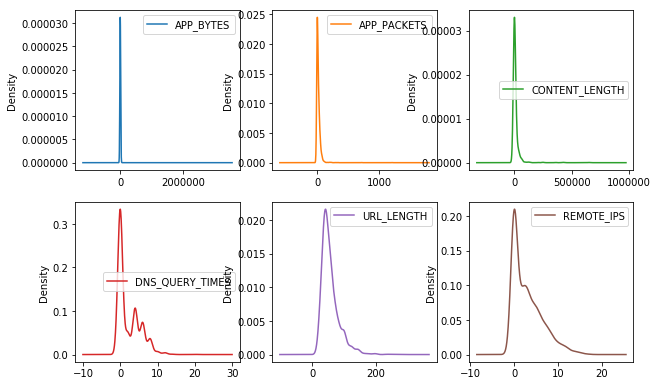

In [46]:
df[[
    'APP_BYTES',
    'APP_PACKETS',
    'CONTENT_LENGTH',
    'DNS_QUERY_TIMES',
    'URL_LENGTH',
    'REMOTE_IPS'
]].plot(kind='density', subplots=True, layout=(3,3), sharex=False, figsize=(10,10))

## Seaborn

> Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

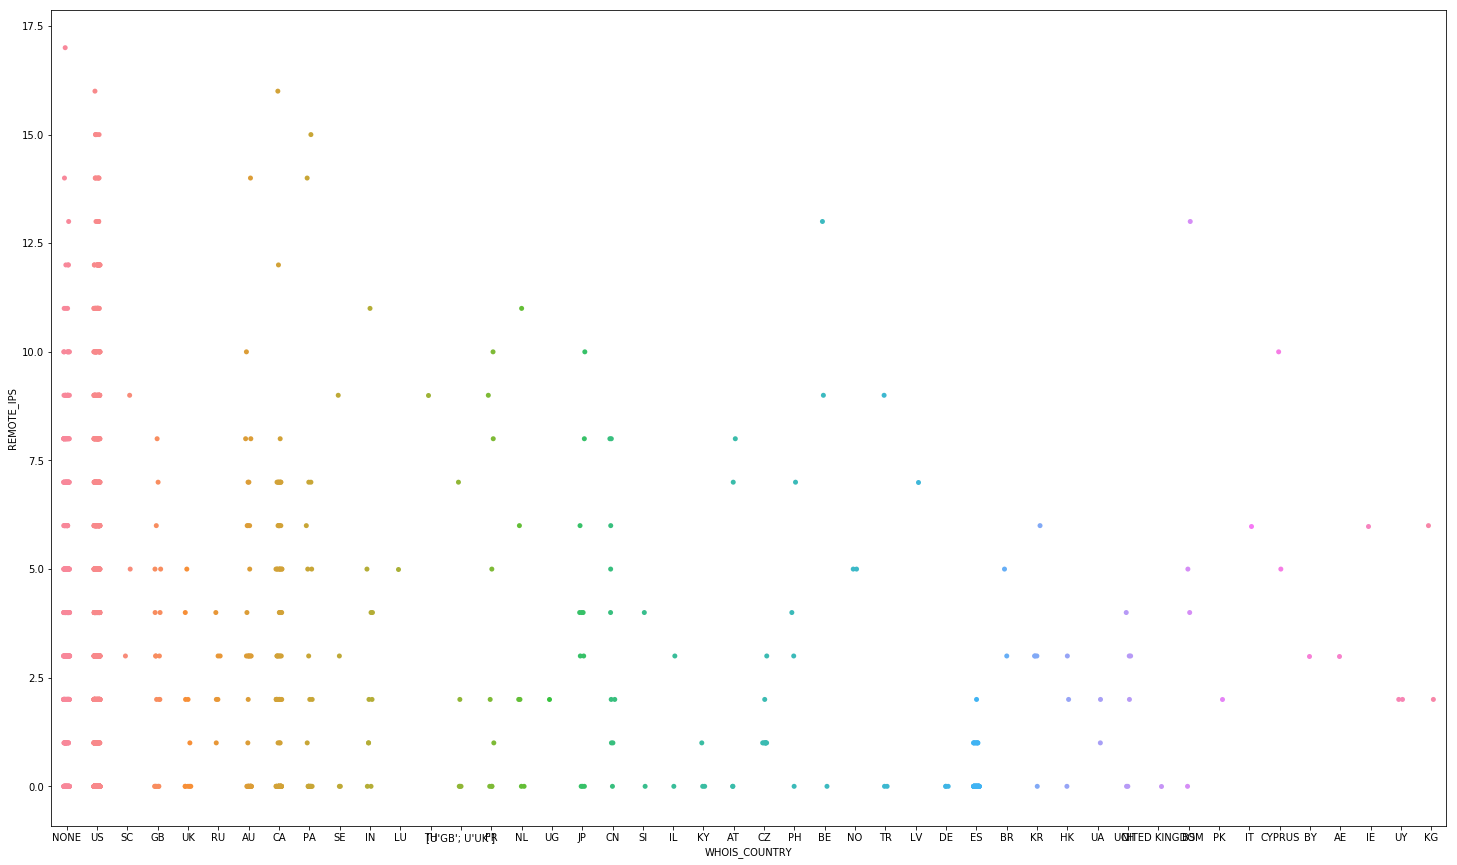

<Figure size 360x360 with 0 Axes>

In [48]:
import seaborn as sns
fig, ax = plt.subplots(1,1,figsize=(25,15))
sns.catplot(x="WHOIS_COUNTRY", y="REMOTE_IPS", data=df, ax=ax)
# Clears the plot
plt.clf()

In [ ]:
correlation = df[['APP_BYTES', 'CONTENT_LENGTH', 'APP_PACKETS']].corr(method='pearson')

In [ ]:
correlation

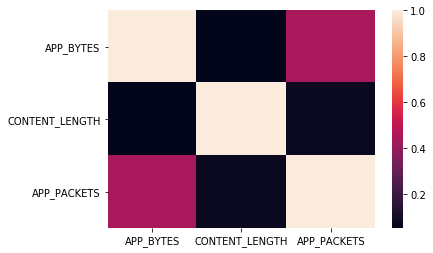

In [50]:
sns.heatmap(correlation)

## Resources
* https://github.com/wesm/pydata-book
* https://pandas.pydata.org/
* http://jupyter.org/index.html
* https://matplotlib.org/
* https://seaborn.pydata.org/index.html

In [6]:
x = 7
x = x+3

In [7]:
x

10

In [8]:
x = 3
y = x
x = 10

In [9]:
y

3